In [26]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
import umap
from sklearn.metrics import adjusted_rand_score, silhouette_score, classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.semi_supervised import LabelSpreading

In [7]:
data = loadmat("dato_taller.mat")
x_entrena = pd.DataFrame(data["x_entena"])
y_entrena = pd.Series(data["y_entrena"].ravel())
x_prueba = pd.DataFrame(data["x_prueba"])

print(x_entrena.shape, x_prueba.shape, y_entrena.shape)
x_entrena.describe().T


(1000, 20) (10000, 20) (1000,)


,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.023801,1.089760,-3.789389,-0.721965,0.027162,0.755513,3.421769
1,1000.0,0.051353,1.080855,-3.275002,-0.655450,0.041898,0.784048,4.189189
2,1000.0,-0.016699,1.079677,-3.673204,-0.787843,0.010982,0.730634,3.115408
3,1000.0,0.020372,1.100977,-3.346933,-0.772707,0.001392,0.784678,3.513436
4,1000.0,0.027876,1.104239,-2.934976,-0.708734,0.021660,0.779033,4.258661
5,1000.0,0.040844,1.076074,-2.966682,-0.735771,0.065818,0.757994,3.112791
6,1000.0,0.020126,1.117848,-3.216156,-0.768629,-0.013546,0.790539,3.563129
7,1000.0,0.009970,1.112153,-3.225683,-0.749929,-0.018637,0.793928,3.234170
8,1000.0,0.001265,1.094216,-3.341144,-0.703068,0.007781,0.763059,3.809522
9,1000.0,-0.036803,1.067097,-3.857510,-0.742587,-0.007605,0.680511,3.245105


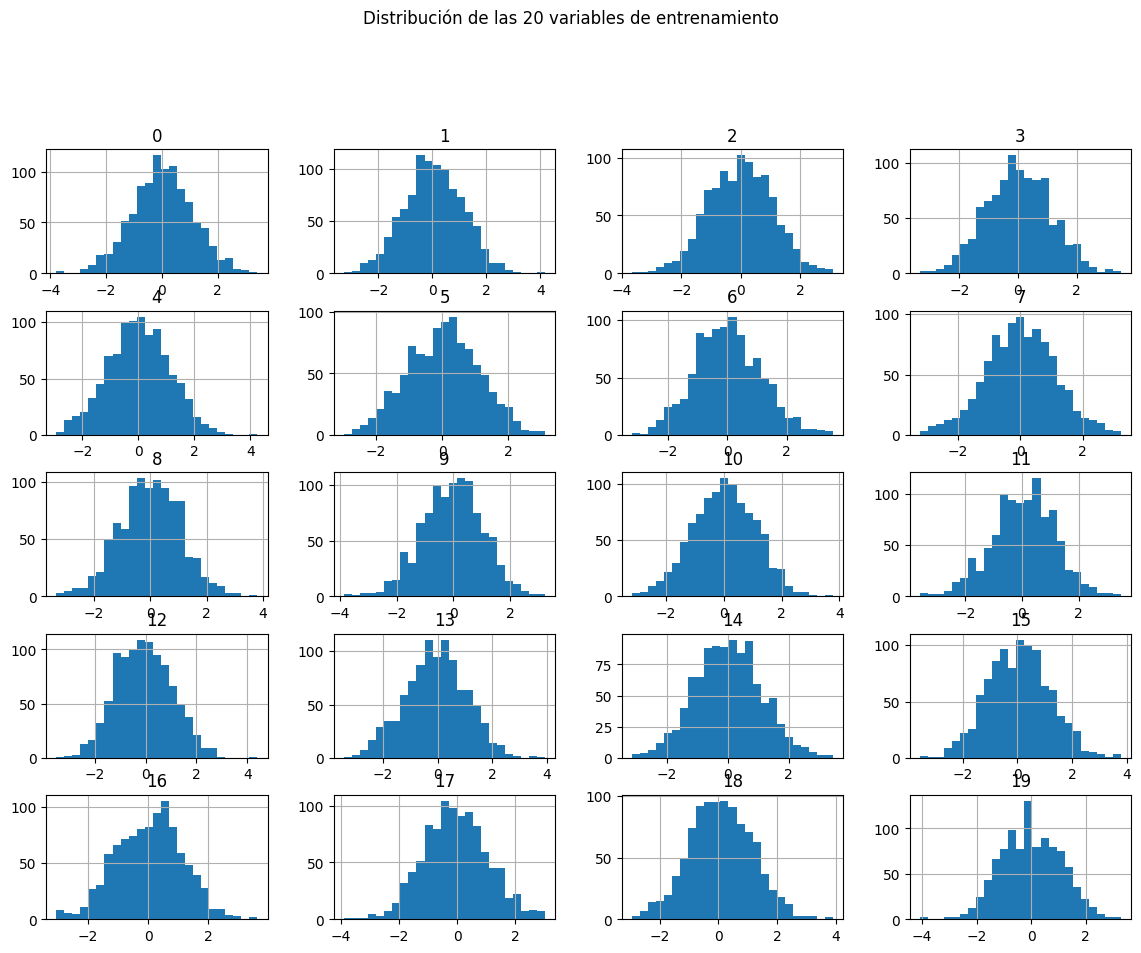

In [8]:


x_entrena.hist(bins=25, figsize=(14,10))
plt.suptitle("Distribución de las 20 variables de entrenamiento", y=1.02)
plt.show()

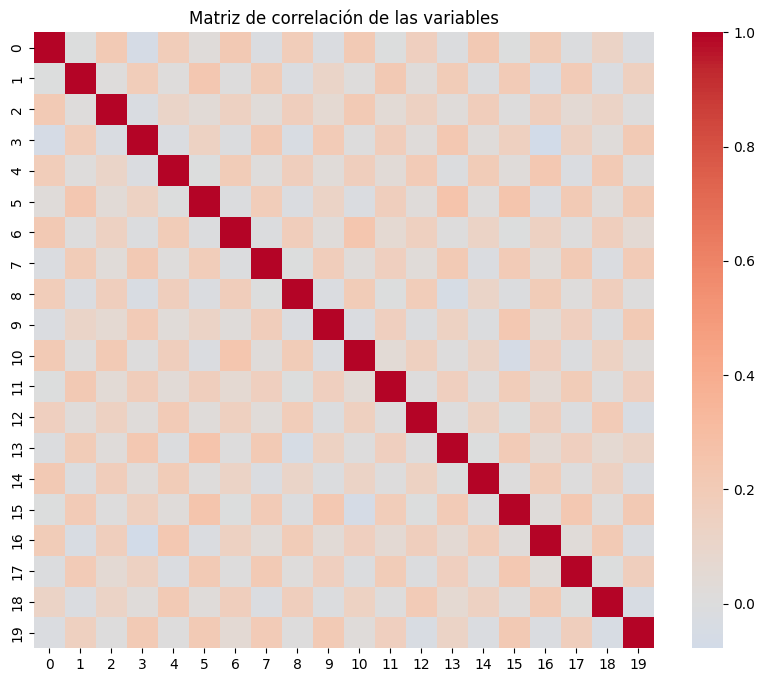

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(x_entrena.corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlación de las variables")
plt.show()

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_entrena)

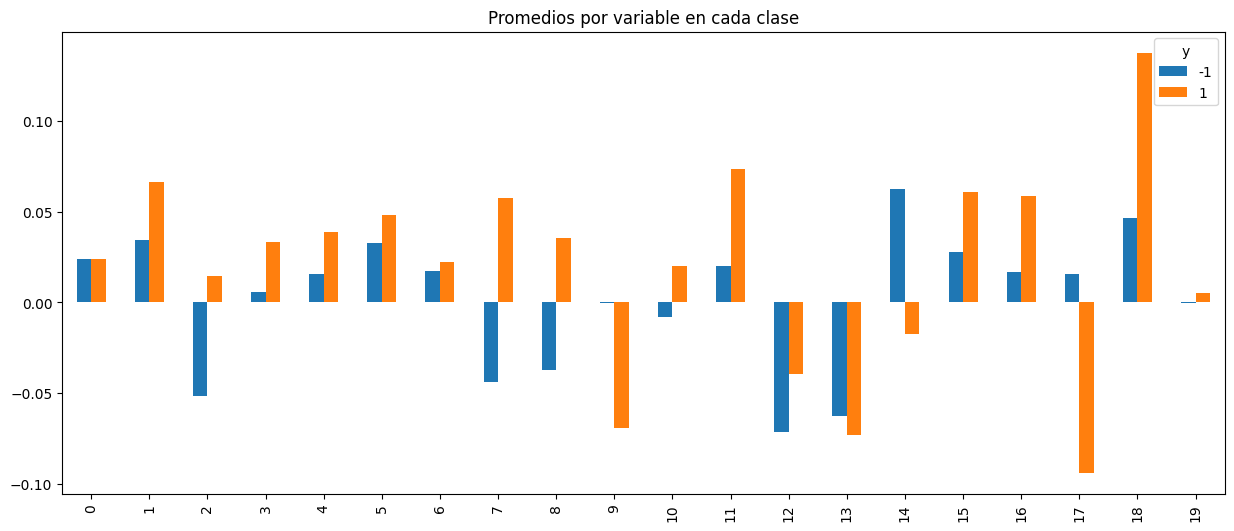

In [11]:
x_entrena["y"] = y_entrena
summary = x_entrena.groupby("y").mean().T
summary.plot(kind='bar', figsize=(15,6))
plt.title('Promedios por variable en cada clase')
plt.show()

In [ ]:
x_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(x_entrena)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y_entrena, cmap='coolwarm', alpha=0.6)
plt.title("Visualización t-SNE (solo exploración)")
plt.show()

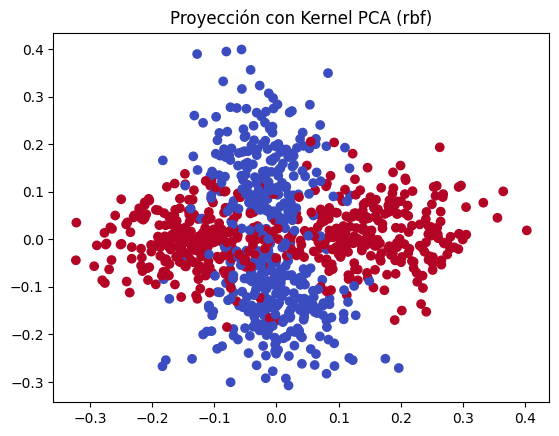

/home/youssef/Documents/UD/Big_Data/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


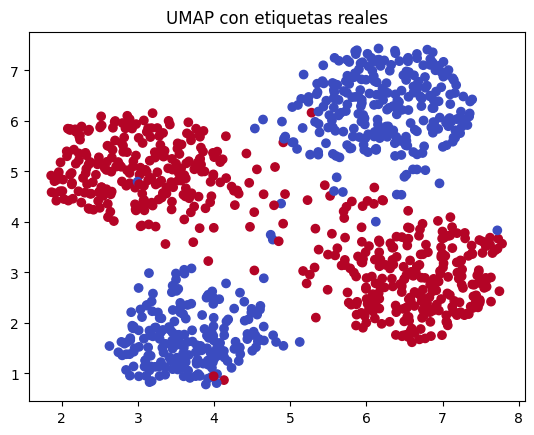

In [13]:


scaler = StandardScaler()

x_entrena.columns = x_entrena.columns.astype(str)
X_scaled = scaler.fit_transform(x_entrena)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)

plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y_entrena, cmap='coolwarm')
plt.title('Proyección con Kernel PCA (rbf)')
plt.show()

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.scatter(X_umap[:,0], X_umap[:,1], c=y_entrena, cmap='coolwarm')
plt.title('UMAP con etiquetas reales')
plt.show()



In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_umap)

print("ARI:", adjusted_rand_score(y_entrena, labels))
print("Silhouette:", silhouette_score(X_umap, labels))

ARI: 0.0014926920105180028
Silhouette: 0.43695810437202454


Kernel PCA (RBF)

La gráfica muestra solapamiento fuerte entre las clases.

El modelo capta algo de curvatura, pero no logra separar bien las etiquetas.

Esto indica que las relaciones no lineales son más complejas que lo que el kernel RBF capta por sí solo.

El ARI ≈ 0 confirma que los clusters del modelo no corresponden a las clases reales.

## UMAP
UMAP logró proyectar los datos en estructuras bien definidas (cuatro grupos claros).

Esas agrupaciones reflejan patrones latentes de los datos originales.

Sin embargo, las etiquetas rojas y azules se intercalan dentro de esos grupos →
las clases reales no se alinean directamente con la estructura geométrica, pero el espacio reducido sí tiene buena cohesión interna (Silhouette ≈ 0.44 → moderadamente alto).

## Metricas

### ARI (Adjusted Rand Index)	0.0015

Los clusters del modelo no coinciden con las etiquetas reales (prácticamente aleatorio).

### Silhouette Score	0.437	

Buena cohesión/separación entre grupos → el espacio UMAP es estructurado, aunque no alineado con las clases.

In [18]:


# Ejemplo con KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels_umap = kmeans.fit_predict(X_umap)

print("ARI respecto a etiquetas reales:", adjusted_rand_score(y_entrena, labels_umap))
print("Silhouette (clusters UMAP):", silhouette_score(X_umap, labels_umap))


ARI respecto a etiquetas reales: 0.46599558515551315
Silhouette (clusters UMAP): 0.6236969232559204


## Metricas

### ARI = 0.466	
Alta correlación entre clusters y etiquetas reales, bueno para clustering
### Silhouette = 0.624	
Muy buena cohesión interna y separación entre clusters (valores > 0.5 indican separación clara).

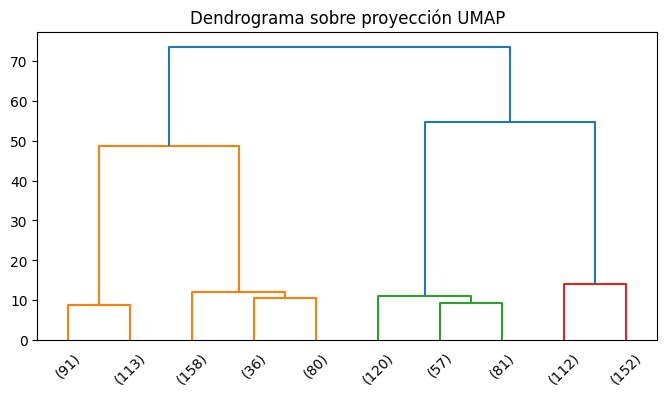

In [20]:


Z = linkage(X_umap, method='ward')
plt.figure(figsize=(8,4))
dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrograma sobre proyección UMAP")
plt.show()


## No supervisado

Accuracy: 0.531
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       469
           1       0.53      1.00      0.69       531

    accuracy                           0.53      1000
   macro avg       0.27      0.50      0.35      1000
weighted avg       0.28      0.53      0.37      1000



/home/youssef/Documents/UD/Big_Data/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/youssef/Documents/UD/Big_Data/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/youssef/Documents/UD/Big_Data/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

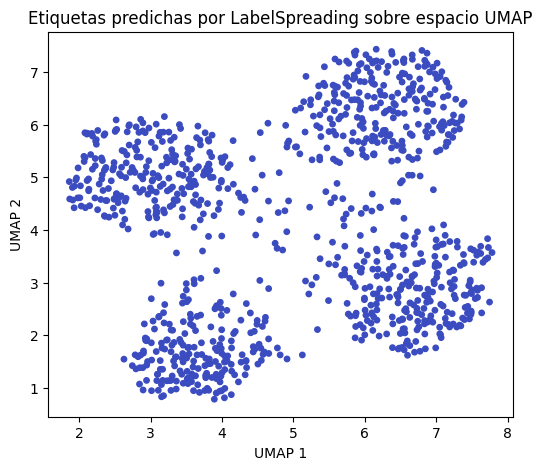

In [27]:


model = LabelSpreading(kernel='rbf', alpha=0.2)
model.fit(X_umap, y_entrena)
y_pred = model.predict(X_umap)

print("Accuracy:", accuracy_score(y_entrena, y_pred))
print(classification_report(y_entrena, y_pred))

plt.figure(figsize=(6,5))
plt.scatter(X_umap[:,0], X_umap[:,1], c=y_pred, cmap='coolwarm', s=15)
plt.title("Etiquetas predichas por LabelSpreading sobre espacio UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

Para aprovechar la estructura descubierta en el espacio UMAP, se aplicó el modelo LabelSpreading con kernel RBF y parámetro alpha = 0.2.
Aunque el espacio reducido mostraba agrupamientos bien definidos, el modelo asignó una sola etiqueta a la mayoría de las muestras.

La Figura muestra la distribución de las etiquetas predichas (y_pred) en el espacio UMAP, donde se observa que el modelo no logró diferenciar las dos clases originales.

Las métricas de desempeño se resumen en la Tabla Y. El modelo alcanzó un accuracy de 53 %, equivalente a la proporción mayoritaria de la clase 1, lo cual evidencia que el método semi-supervisado no consiguió aprovechar la información geométrica para propagar correctamente las etiquetas.

## Conclusión UMAP

El espacio UMAP refleja una estructura bien definida, pero las etiquetas binarias no siguen esa misma organización interna.
Por tanto, aunque el clustering no supervisado sobre UMAP fue exitoso, el aprendizaje semi-supervisado con LabelSpreading no logró generalizar las clases reales.
Este resultado es útil porque muestra que los datos contienen patrones no lineales multiclase o subestructuras internas que no pueden representarse mediante una simple etiqueta binaria